In [13]:
from sklearn.datasets import load_boston
bos=load_boston()
dir(bos)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [14]:
bos.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [15]:
import pandas as pd
df = pd.DataFrame(bos.data,columns=bos.feature_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
final=df.drop(["ZN","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"],axis=1)
final.head()

,CRIM,INDUS
0,0.00632,2.31
1,0.02731,7.07
2,0.02729,7.07
3,0.03237,2.18
4,0.06905,2.18


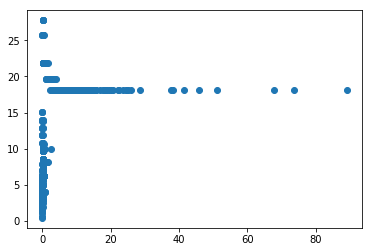

In [21]:
import matplotlib.pyplot as plt
plt.scatter(final["CRIM"],final["INDUS"])


In [25]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(final[["CRIM","INDUS"]])
    sse.append(km.inertia_)
sse    

[61130.765439739494,
 31896.386284661283,
 13952.172364241473,
 8772.469568096698,
 6689.339950528413,
 4573.071496283543,
 3177.041517644577,
 2464.0982142675266,
 1889.2724430729356]

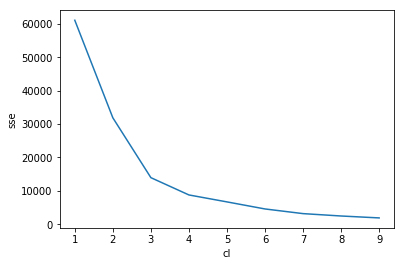

In [41]:
plt.xlabel("cl")
plt.ylabel("sse")
plt.plot(k_rng,sse)
plt.show()

In [29]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
ym=km.fit_predict(final)

In [33]:
final["cluster"]=ym
final.head()

,CRIM,INDUS,cluster
0,0.00632,2.31,1
1,0.02731,7.07,1
2,0.02729,7.07,1
3,0.03237,2.18,1
4,0.06905,2.18,1


In [35]:
final1=final[final.cluster==0]
final2=final[final.cluster==1]
final3=final[final.cluster==3]
final4=final[final.cluster==4]


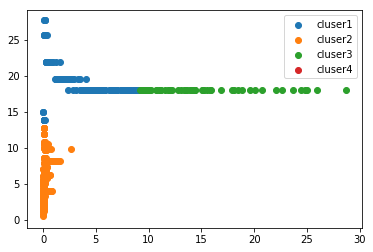

In [39]:
import matplotlib.pyplot as plt
plt.scatter(final1["CRIM"],final1["INDUS"],label="cluser1")
plt.scatter(final2["CRIM"],final2["INDUS"],label="cluser2")
plt.scatter(final3["CRIM"],final3["INDUS"],label="cluser3")
plt.scatter(final4["CRIM"],final4["INDUS"],label="cluser4")
plt.scatter()
plt.legend()